In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

In [207]:
df = pd.read_csv('HS_2022Oct.csv')

In [208]:
df.head()

,Time,temp1,x1,y1,z1,temp2,x2,y2,z2,FR
0,2022-10-31 17:06,22.0,6.6,12.3,-15.7,21.7,1.1,2.5,-3.5,0
1,2022-10-31 17:06,22.0,6.7,13.3,-20.7,21.8,1.2,3.5,-3.5,0
2,2022-10-31 17:06,22.0,7.0,12.3,-24.7,21.9,1.3,4.5,-2.5,0
3,2022-10-31 17:06,22.0,7.5,10.3,-22.7,22.0,1.2,2.5,-3.5,0
4,2022-10-31 17:06,22.0,82.1,188.3,-513.7,22.0,1.0,2.5,-2.5,0


In [209]:
df['Time'] = pd.to_datetime(df['Time'],format='%Y-%m-%d %H:%M')

In [210]:
df.set_index('Time', inplace=True)

In [211]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp1,31617.0,27.754069,1.230186,22.0,27.8,28.3,28.4,28.5
x1,31617.0,72.225831,93.667667,6.2,8.5,9.6,143.7,310.6
y1,31617.0,162.312145,199.889332,5.3,17.3,29.3,374.3,504.3
z1,31617.0,-161.123411,195.496710,-518.7,-349.7,-34.7,-22.7,-11.7
temp2,31617.0,32.624658,2.521240,21.4,32.5,33.6,34.0,36.1
x2,31617.0,6.498849,7.921668,0.9,1.7,2.2,9.1,49.6
y2,31617.0,20.986257,31.136476,0.0,5.5,9.5,21.5,371.5
z2,31617.0,-23.345083,35.893881,-253.5,-22.5,-8.5,-5.5,22.5
FR,31617.0,0.009552,0.097267,0.0,0.0,0.0,0.0,1.0


In [212]:
failure = df[df['FR']==1]
df2 = df.drop(['FR'], axis=1)



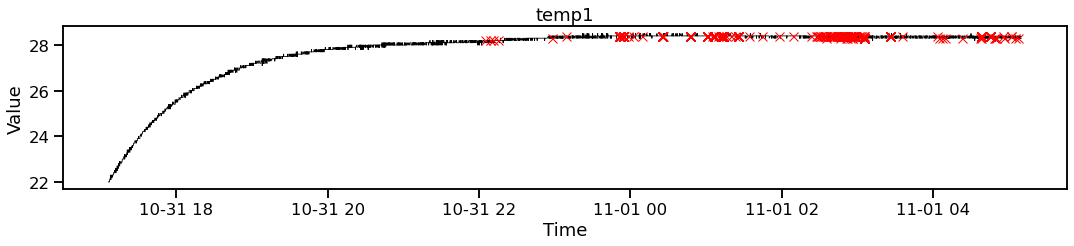

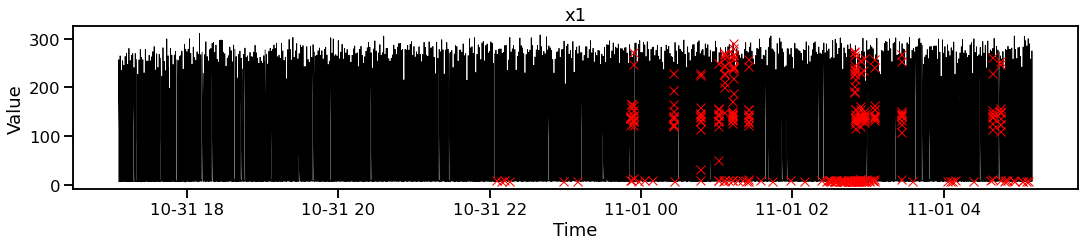

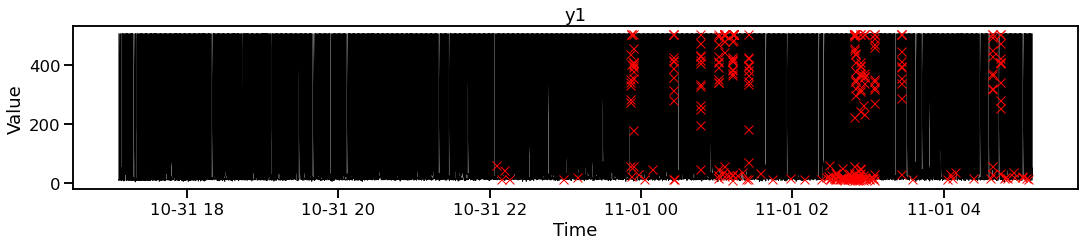

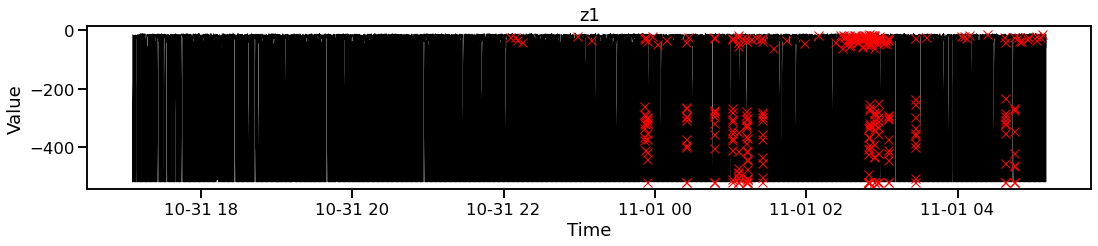

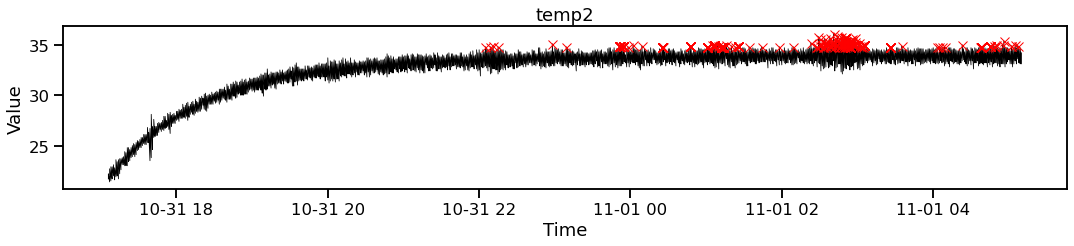

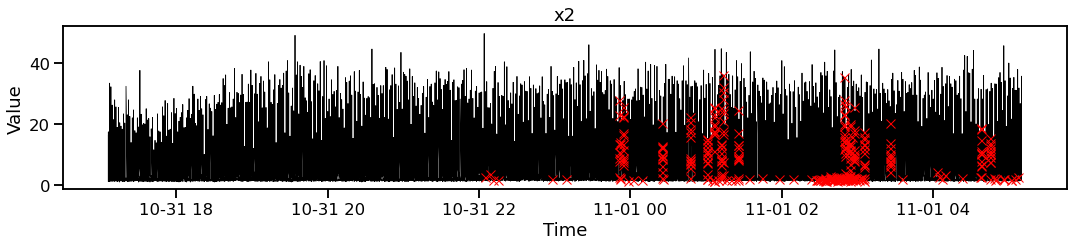

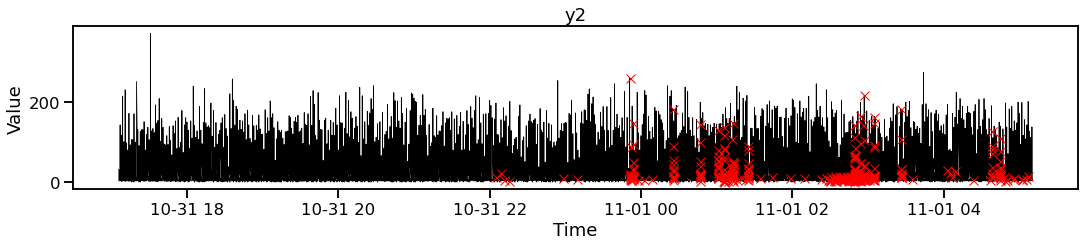

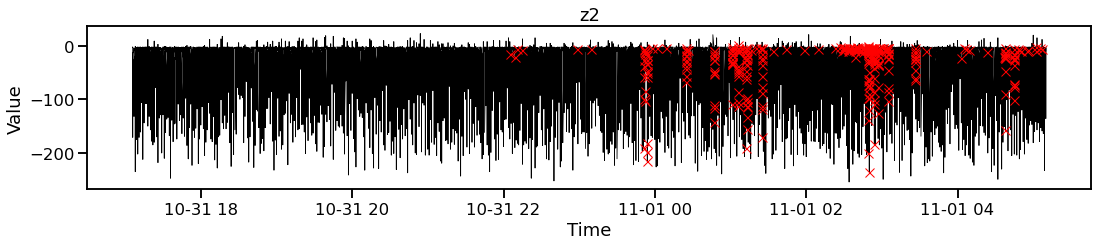

In [258]:
import warnings
ytickFormat = '%.2f'

names = df2.columns

for name in names:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18, 3))
    _ = plt.plot(df[name], linestyle='-', color='black', linewidth=0.8)
    _ = plt.plot(failure[name], linestyle='none', color='red', linewidth=0.8 , marker = 'x')
    _ = plt.title(name)
    _ = plt.xlabel('Time')
    _ = plt.ylabel('Value')
    _ = plt.show()

In [214]:
rolling_mean = df.resample('D').mean()
rolling_std = df.resample('D').std()

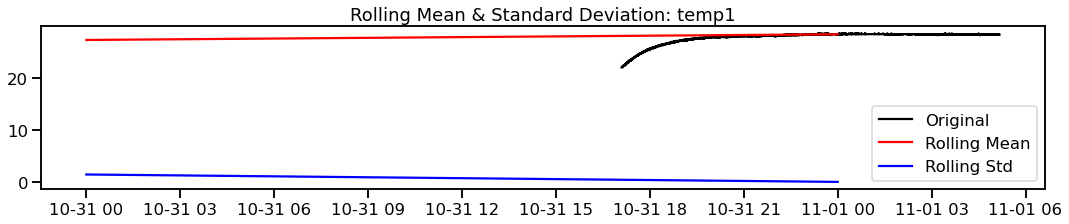

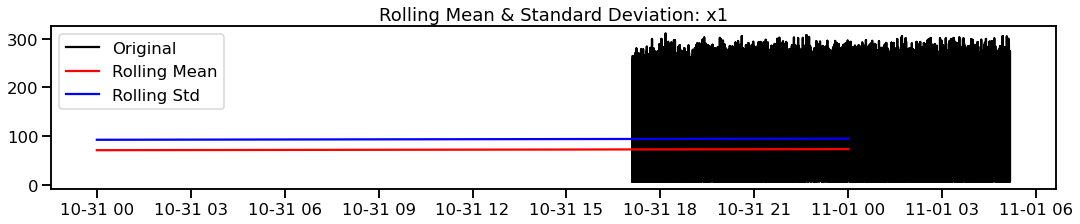

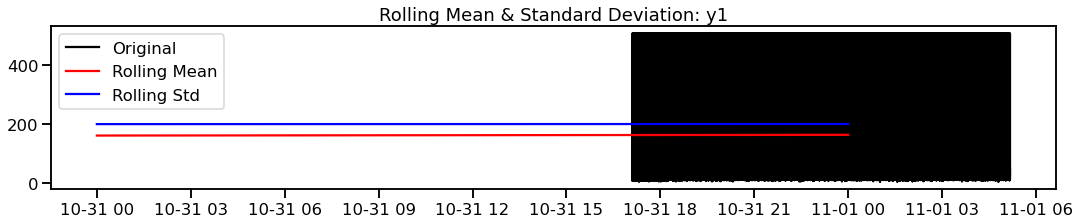

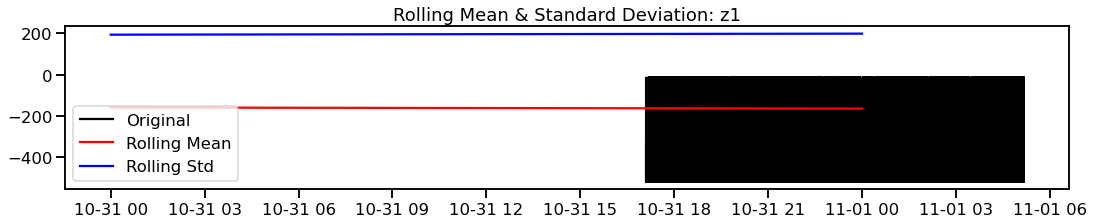

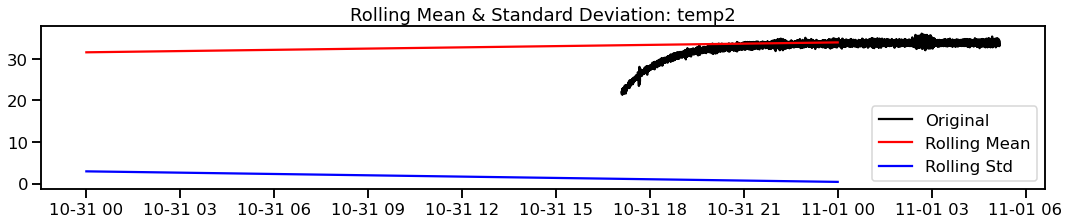

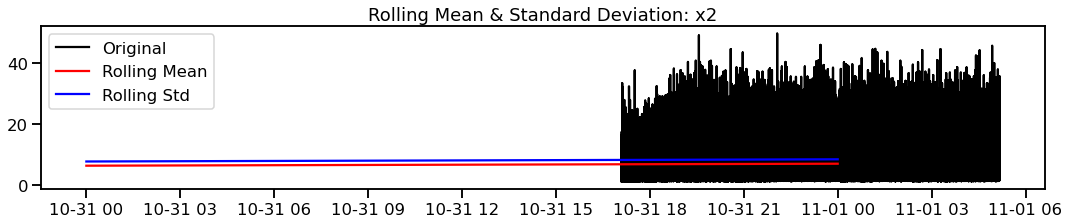

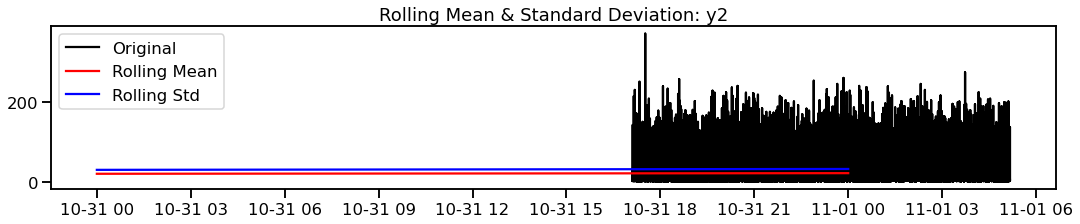

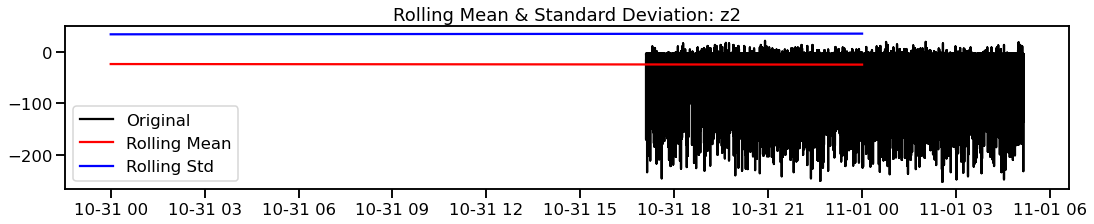

In [215]:
for name in names:
    _ = plt.figure(figsize=(18, 3))
    _ = plt.plot(df[name], color='black',label='Original')
    _ = plt.plot(rolling_mean[name], color='red', label='Rolling Mean')
    _ = plt.plot(rolling_std[name], color='blue', label = 'Rolling Std')
    _ = plt.legend(loc='best')
    _ = plt.title('Rolling Mean & Standard Deviation: {}'.format(name))
    _ = plt.show(block=False)

In [216]:
# Standardize/scale the dataset and apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
# Extract the names of the numerical columns
df2 = df.drop(['FR'], axis=1)
names=df2.columns
x = df[names]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

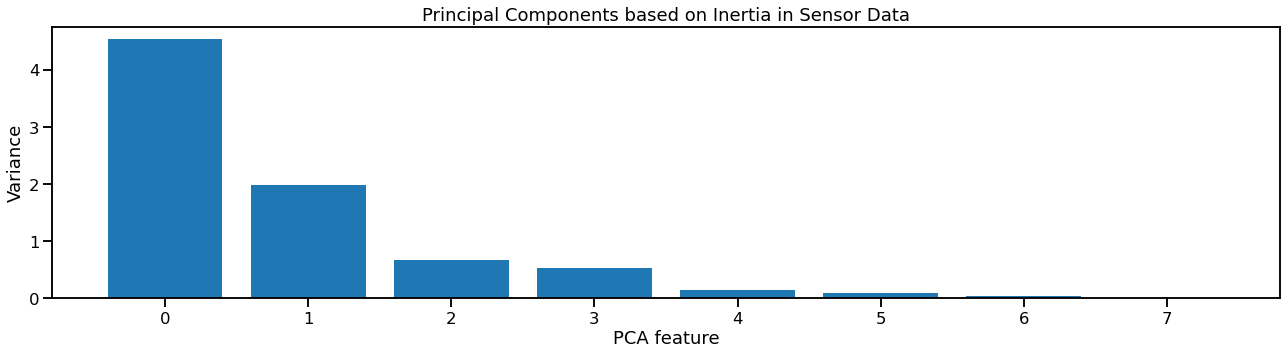

In [217]:
features = range(pca.n_components_)
_ = plt.figure(figsize=(22, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Principal Components based on Inertia in Sensor Data")
plt.show()

In [218]:
# Calculate PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [219]:

df['pc1']=pd.Series(principalDf['pc1'].values, index=df.index)
df['pc2']=pd.Series(principalDf['pc2'].values, index=df.index)

In [220]:
df.head()


,temp1,x1,y1,z1,temp2,x2,y2,z2,FR,pc1,pc2
Time,,,,,,,,,,,
2022-10-31 17:06:00,22.0,6.6,12.3,-15.7,21.7,1.1,2.5,-3.5,0,-220.619868,1.043467
2022-10-31 17:06:00,22.0,6.7,13.3,-20.7,21.8,1.2,3.5,-3.5,0,-216.553874,3.873075
2022-10-31 17:06:00,22.0,7.0,12.3,-24.7,21.9,1.3,4.5,-2.5,0,-214.510256,7.427271
2022-10-31 17:06:00,22.0,7.5,10.3,-22.7,22.0,1.2,2.5,-3.5,0,-217.068611,7.443456
2022-10-31 17:06:00,22.0,82.1,188.3,-513.7,22.0,1.0,2.5,-2.5,0,250.255822,232.813379


In [221]:
from statsmodels.tsa.stattools import adfuller
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc1'])
print(result[1]) #https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc442.htm

0.0


In [222]:
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc2'])
print(result[1])

0.0


In [223]:
# Compute change in daily mean 
pca1 = principalDf['pc1'].pct_change()
# Compute autocorrelation
autocorrelation = pca1.dropna().autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  -0.057376510712677374


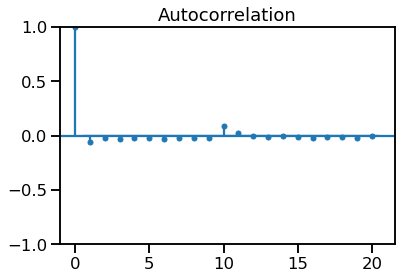

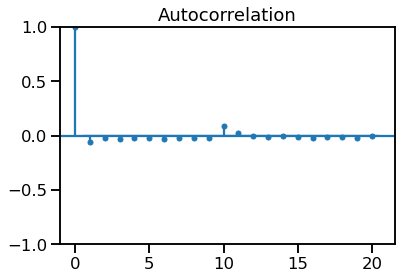

In [224]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca1.dropna(), lags=20, alpha=0.05)

In [225]:
# Compute change in daily mean 
pca2 = principalDf['pc2'].pct_change()
# Compute autocorrelation
autocorrelation = pca2.autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  5.196679707660047e-06


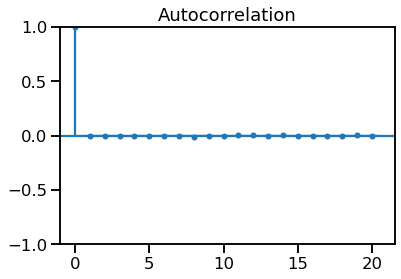

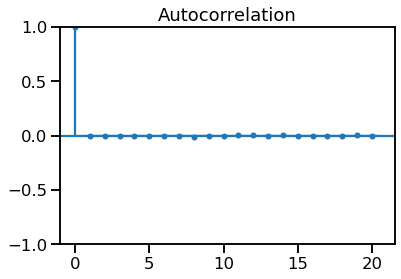

In [226]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca2.dropna(), lags=20, alpha=0.05)

In [227]:
# We will be detecting outliers using IQR method
# outlier_lower = Q1 - (1.5*IQR)
# outlier_upper = Q3 + (1.5*IQR)
# Calculate outlier bounds for pc1
q1_pc1, q3_pc1 = df['pc1'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)
# Calculate outlier bounds for pc2
q1_pc2, q3_pc2 = df['pc2'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)
lower_pc1, upper_pc1


(-984.7089643270335, 1085.9119788695039)

In [228]:
lower_pc2, upper_pc2


(-46.10744949607712, 46.14121825497177)

In [229]:
df['anomaly_pc1'] = ((df['pc1']>upper_pc1) | (df['pc1']<lower_pc1)).astype('int')
df['anomaly_pc2'] = ((df['pc2']>upper_pc2) | (df['pc2']<lower_pc2)).astype('int')

In [230]:
df['anomaly_pc1'].value_counts()


0    31617
Name: anomaly_pc1, dtype: int64

In [231]:
df['anomaly_pc2'].value_counts()


0    26659
1     4958
Name: anomaly_pc2, dtype: int64

In [232]:
outliers_pc1 = df.loc[(df['pc1']>upper_pc1) | (df['pc1']<lower_pc1), 'pc1']
outliers_pc2 = df.loc[(df['pc2']>upper_pc2) | (df['pc2']<lower_pc2), 'pc2']

In [233]:
len(outliers_pc1)/len(df)


0.0

In [234]:
len(outliers_pc2)/len(df)


0.1568143720150552

In [235]:
# Apply SelectKBest class to extract the best 3 features - Univariate feature selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
x = df.drop([ 'FR','pc1', 'pc2', 'anomaly_pc1', 'anomaly_pc2'], axis=1)
y = df['FR']
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(x_scaled,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(3, 'Score'))

  Feature      Score
2      y1  28.243402
1      x1  16.483534
4   temp2  10.333653


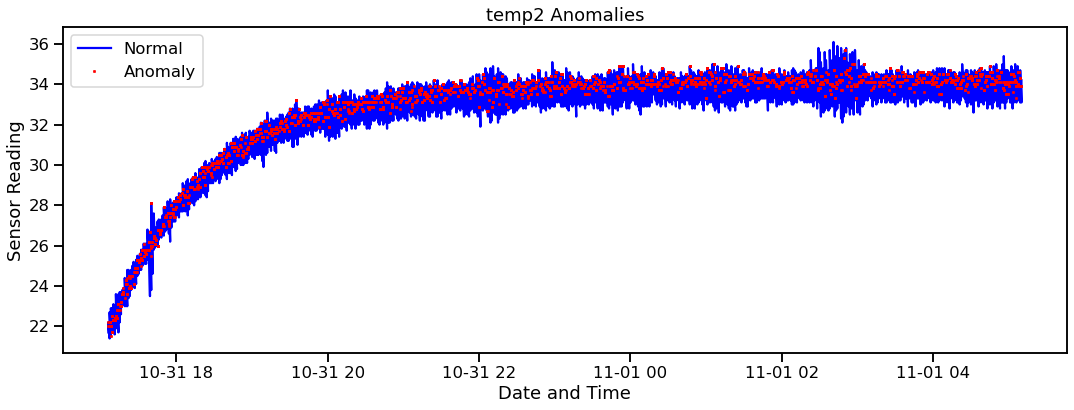

In [243]:
a = df[df['anomaly_pc2'] == 1]
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['temp2'], color='blue', label='Normal')
_ = plt.plot(a['temp2'], linestyle='none', marker='X', color='red', markersize=2, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('temp2 Anomalies')
_ = plt.legend(loc='best')
plt.show();

K Means Clustering Model

In [244]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(principalDf.values)
labels = kmeans.predict(principalDf.values)
unique_elements, counts_elements = np.unique(labels, return_counts=True)
clusters = np.asarray((unique_elements, counts_elements))

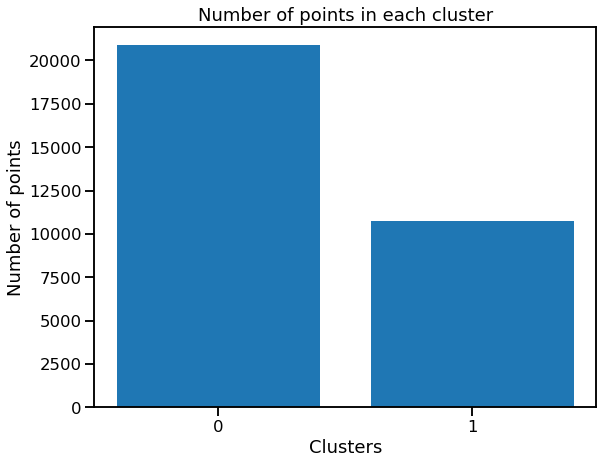

In [245]:
_ = plt.figure(figsize = (9, 7))
_ = plt.bar(clusters[0], clusters[1], tick_label=clusters[0])
_ = plt.xlabel('Clusters')
_ = plt.ylabel('Number of points')
_ = plt.title('Number of points in each cluster')
plt.show()

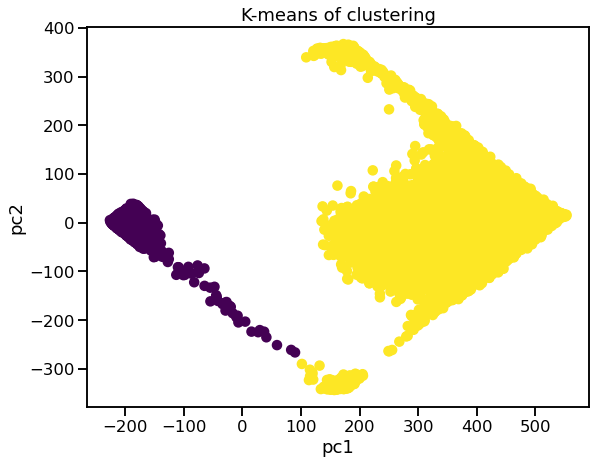

In [239]:
_ = plt.figure(figsize=(9,7))
_ = plt.scatter(principalDf['pc1'], principalDf['pc2'], c=labels)
_ = plt.xlabel('pc1')
_ = plt.ylabel('pc2')
_ = plt.title('K-means of clustering')
plt.show()

In [246]:
def DistancePoints(data, model):
    """ Function that calculates the distance between a point and centroid of a cluster, 
            returns the distances in pandas series"""
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)

In [247]:
# Assume that 13% of the entire data set are anomalies 
outliers_fraction = 0.13
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = DistancePoints(principalDf, kmeans)
# number of observations that equate to the 13% of the entire data set
number_of_outliers = int(outliers_fraction*len(distance))
# Take the minimum of the largest 13% of the distances as the threshold
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
principalDf['anomaly1'] = (distance >= threshold).astype(int)

In [248]:
principalDf.head()


,pc1,pc2,anomaly2,anomaly1
0,-220.619868,1.043467,1,0
1,-216.553874,3.873075,1,0
2,-214.510256,7.427271,1,0
3,-217.068611,7.443456,1,0
4,250.255822,232.813379,-1,0


In [249]:
principalDf['anomaly1'].value_counts()


0    27507
1     4110
Name: anomaly1, dtype: int64

In [250]:
principalDf['anomaly2'].value_counts()


 1    30368
-1     1249
Name: anomaly2, dtype: int64

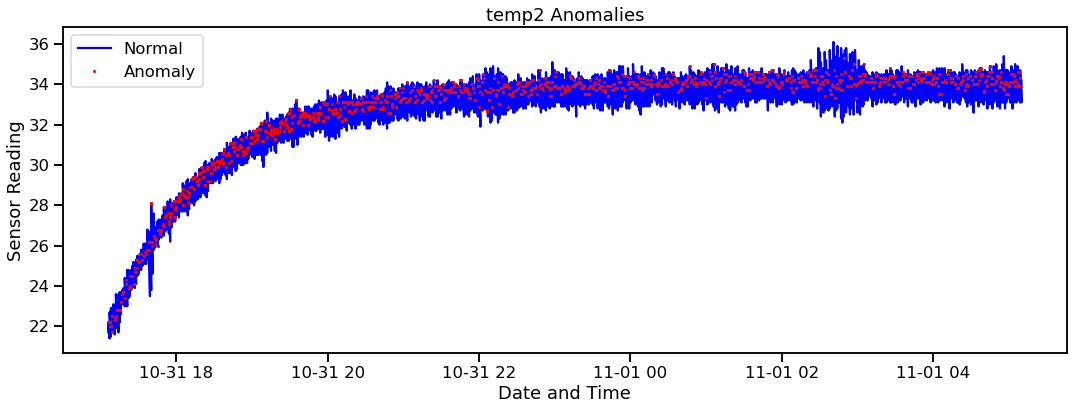

In [253]:
df['anomaly1'] = pd.Series(principalDf['anomaly1'].values, index=df.index)
a = df[df['anomaly1'] == 1] 
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['temp2'], color='blue', label='Normal')
_ = plt.plot(a['temp2'], linestyle='none', marker='X', color='red', markersize=2, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('temp2 Anomalies')
_ = plt.legend(loc='best')
plt.show();

Isolation Forest

In [254]:
from sklearn.ensemble import IsolationForest

outliers_fraction = 0.0395
model =  IsolationForest(contamination=outliers_fraction)
model.fit(principalDf.values) 
principalDf['anomaly2'] = pd.Series(model.predict(principalDf.values))

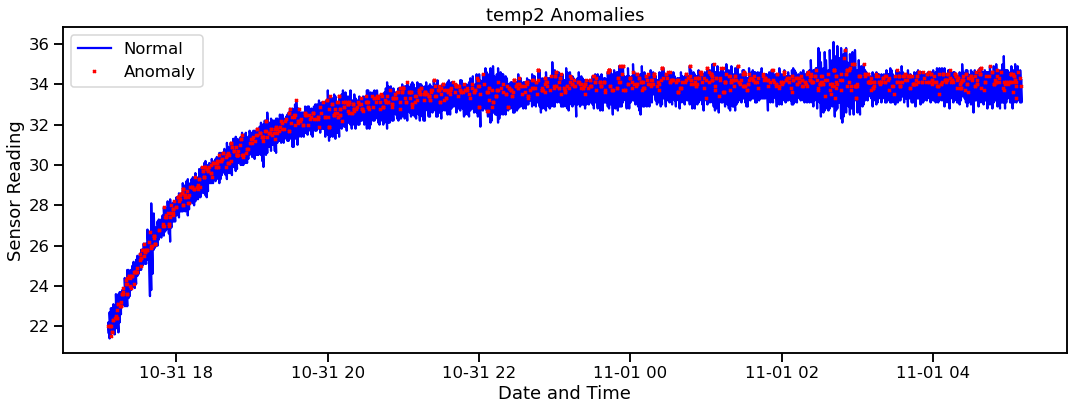

In [255]:
df['anomaly2'] = pd.Series(principalDf['anomaly2'].values, index=df.index)
a = df.loc[df['anomaly2'] == -1] 
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['temp2'], color='blue', label='Normal')
_ = plt.plot(a['temp2'], linestyle='none', marker='X', color='red', markersize=3, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('temp2 Anomalies')
_ = plt.legend(loc='best')
plt.show();